# Age and Education Level of 2017 Czech Parliament Election Candidates

Choose at least three parties that are going to participate in the election.
Scrap the web pages https://volby.cz to get list of all candidates for the chosen parties
(good place to start: https://volby.cz/pls/ps2017/ps11?xjazyk=CZ&xv=1&xt=1).

In [1]:
import re
from collections import Counter
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def read_party_df(url):
    r = requests.get(url)
    print(r.url, r.ok)
    dfs = pd.read_html(r.text, flavor='bs4', skiprows=2)
    column_names = {1: 'Kraj', 2: 'Number', 3: 'Name', 4: 'Age',
                    5: 'Party', 6: 'Political affiliation'}
    # first two rows are columns names
    # drop uninmportant columns
    # correct columns names
    return dfs[0].drop([0, 1])\
                 .drop([0, 7, 8], axis=1)\
                 .rename(index=lambda x: x - 2, columns=column_names)

In [4]:
url = 'https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana={}&xv=1&xt=1'
urls = {
    'ODS': url.format(1),
    'ČSSD': url.format(4),
    'KSČM': url.format(8),
    'Piráti': url.format(15),
    'TOP09': url.format(20),
    'ANO': url.format(21),
    'KDU-ČSL': url.format(24),
    'DSSS': url.format(28),
    'SPD': url.format(29),
}

df = pd.concat({party: read_party_df(url) for party, url in urls.items()})
df.info()

https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=1&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=4&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=8&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=15&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=20&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=21&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=24&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=28&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=29&xv=1&xt=1 True
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3062 entries, (ANO, 0) to (ČSSD, 340)
Data columns (total 8 columns):
Age                      3062 non-null int64
Kraj                     3062 non-null object
Name                     3062 non-null object
Number                   3062 non-null int64

In [5]:
df.head()

Age             Kraj                          Name  Number Party  \
ANO 0   61       Pardubický                 Akerman Miloš      14   ANO   
    1   48          Ústecký              Andrš Radek Ing.      22   ANO   
    2   52      Karlovarský  Arnoldová Lenka Mgr. et Mgr.      10   ANO   
    3   53     Jihomoravský     Artimová Zuzana Olga Ing.      24   ANO   
    4   43  Moravskoslezský            Babinec Radim Mgr.      27   ANO   

      Political affiliation  9  10  
ANO 0                   ANO  -  10  
    1                   ANO  -  15  
    2                   ANO  -   7  
    3                   ANO  -  17  
    4                   ANO  -  17

## 1. Use Data Visualisation to Depict the Age Distribution of Candidates
    
- How many candidates are young, old and middle aged?
- Which party has older candidates compared to the others?

In [6]:
df['Age'].describe()

count    3062.000000
mean       46.711953
std        11.993218
min        21.000000
25%        38.000000
50%        47.000000
75%        55.000000
max        80.000000
Name: Age, dtype: float64

The histogram below shows how many candidates are young, old and middle aged.
Most of all candidates are between circa 45 to 50 years old.

Text(0,0.5,'Frequency')

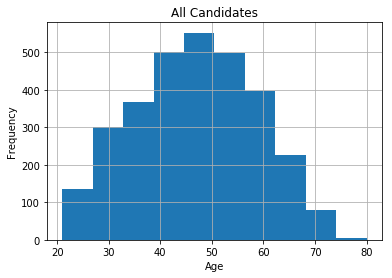

In [7]:
ax = df.hist(column='Age')[0][0]
ax.set_title('All Candidates')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

In [8]:
df['Age'].groupby(level=0).describe()

,count,mean,std,min,25%,50%,75%,max
ANO,341.0,48.580645,10.252264,22.0,42.0,48.0,56.0,72.0
DSSS,341.0,44.422287,12.944587,21.0,34.0,44.0,53.0,74.0
KDU-ČSL,339.0,48.448378,11.325189,21.0,40.0,49.0,57.0,80.0
KSČM,341.0,49.841642,12.639044,21.0,41.0,51.0,61.0,74.0
ODS,341.0,48.563050,10.492279,22.0,42.0,49.0,55.0,74.0
Piráti,336.0,37.157738,10.743778,21.0,30.0,34.0,43.0,71.0
SPD,341.0,47.900293,12.152537,21.0,39.0,48.0,57.0,74.0
TOP09,341.0,47.085044,11.364099,21.0,40.0,47.0,55.0,79.0
ČSSD,341.0,48.278592,10.730185,24.0,41.0,49.0,57.0,74.0


The biggest number of young candidates are in the party Piráti and the oldest party is KSČM. Insteresting is histogram of ODS party which show the majority of middle aged candidates.

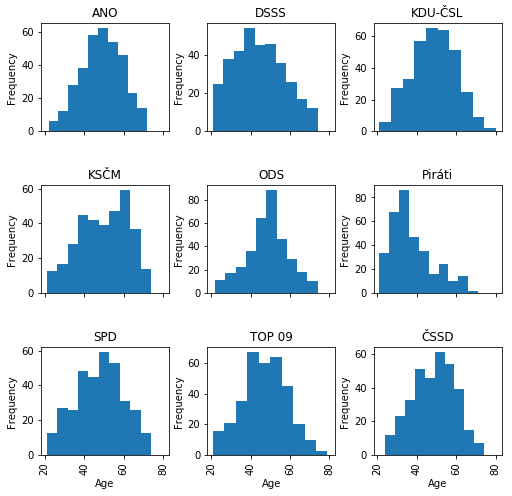

In [9]:
axes = df.hist(column='Age', by='Party', sharex=True, figsize=(8, 8))
for ax in axes.ravel():
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

Text(0,0.5,'Age')

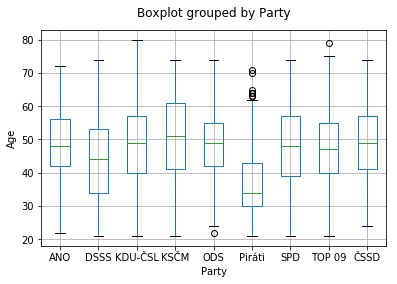

In [10]:
ax = df.boxplot(column='Age', by='Party')
ax.set_title('')
ax.set_ylabel('Age')

## 2. Use the Titles of Candidates to Get the Idea on Education Levels


Try to distinguish at least three education levels corresponding to:

- no title,
- Bc.,
- Ing., Mgr. and analogous and higher.
    
E.g. *Barteček Ivo prof. PhDr. CSc.* has three titles 'prof.', 'PhDr.' and 'CSc.'.

Your visualisation should answer at least these questions:

- How frequent are the education levels of candidates for each of the choosen parties?
- How *'educated'* is each party compared to the others?
- How frequent is each education level within all candidates?

In [11]:
splited_names = df['Name'].apply(lambda x: re.split(' |, +', x))
splited_names.head()

ANO  0                      [Akerman, Miloš]
     1                  [Andrš, Radek, Ing.]
     2    [Arnoldová, Lenka, Mgr., et, Mgr.]
     3        [Artimová, Zuzana, Olga, Ing.]
     4                [Babinec, Radim, Mgr.]
Name: Name, dtype: object

In [12]:
# split each name to list by whitespace
# flatten the list
# convert the list to set
counter = Counter([item for sublist in splited_names.tolist() for item in sublist])

# assume that title ends with '.' (e.g. Bc., Ing.) or
# is uppercase (e.g. MBA, BA)
degrees = {x for x in counter if x.endswith('.') or x.isupper()}
# let's make some assuptions
# do not care about 'ml.'
# if somebody is 'dr. h. c.' he or she either buy it or is master anyway
# 'DiS.' is considered as no degree, sorry
degrees -= {'ml.', 'Dr.h.c.', 'dr.', 'h.', 'c.', 'DiS.', 'Dis.', 'dipl.', 'um.'}
# bachelor's degrees in this case start with 'B' or it's 'LL.B.'
bachelors = {degree for degree in degrees if degree.startswith('B')} | {'LL.B.'}
masters = degrees - bachelors
print('bachelors:', ', '.join(bachelors))
print('masters:', ', '.join(masters))

bachelors: BBA, B.A., BSc., Bc., BA, BD, LL.B.
masters: MUDr., prof., Ph.D., doc., MFA, ThLic., JUDr., arch., MBA, ThMgr., CSc., EBIR, RSDr., LL.M., Th.D., Mgr., DBA, Ing., MVDr., FICS, PhDr., Dr., PaedDr., PharmDr., MPA, ING, MSc., MBE, MgA., S.E., EUR, RNDr., M.A.


In [13]:
def classify_titles(xs):
    # TODO try sets intersection
    xs = set(xs)
    if not masters.isdisjoint(xs):
        return 'Master'
    if not bachelors.isdisjoint(xs):
        return 'Bachelor'
    return 'No title'

df['Education'] = splited_names.apply(classify_titles)
df.tail()

Age             Kraj                  Name  Number Party  \
ČSSD 336   50  Královéhradecký  Zimová Michaela Ing.      15  ČSSD   
     337   37          Ústecký  Znojemský Lukáš Ing.      14  ČSSD   
     338   55         Plzeňský     Zrůbek Karel Mgr.       8  ČSSD   
     339   34         Vysočina    Žák Milan Bc. DiS.      18  ČSSD   
     340   52        Liberecký   Žatecká Romana Mgr.       5  ČSSD   

         Political affiliation  9  10 Education  
ČSSD 336                  ČSSD  -  14    Master  
     337                  ČSSD  -  13    Master  
     338                  ČSSD  -   7    Master  
     339                  ČSSD  -  17  Bachelor  
     340                  ČSSD  -   -    Master

In [14]:
edu_counts = df['Education'].groupby(level=0)\
                            .value_counts()\
                            .unstack(level=1)
edu_percent = edu_counts.div(edu_counts.sum(axis=1), axis=0)\
                        .multiply(100)[['No title', 'Bachelor', 'Master']]

This visualization show education distribution across choosen parties. The most 'uneducated' parties are DSSS and SPD. There is not a lot of bachelors across all parties. Master degree or higher is the most common between candidates.

Text(0,0.5,'Percentage in Party')

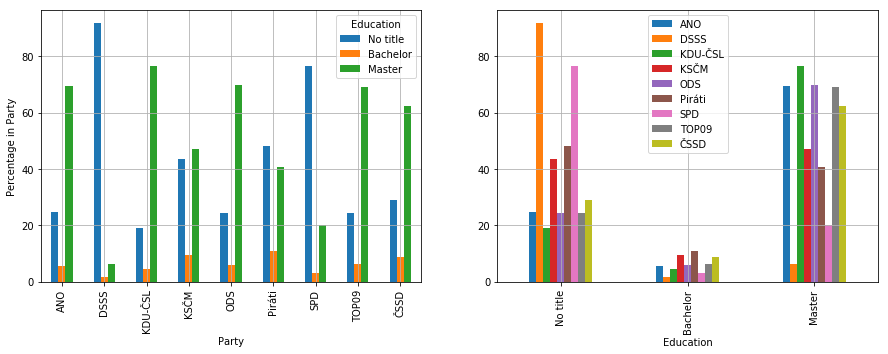

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
edu_percent.plot.bar(ax=ax1, grid=True)
edu_percent.T.plot.bar(ax=ax2, grid=True)
ax1.set_xlabel('Party')
ax1.set_ylabel('Percentage in Party')

The bar chart below shows education level within all candidates.

Text(0,0.5,'Count')

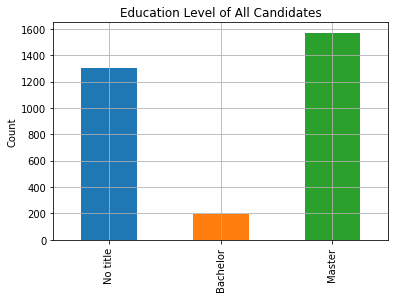

In [16]:
axes = df['Education'].value_counts()[['No title', 'Bachelor', 'Master']].plot(kind='bar', grid=True)
axes.set_title('Education Level of All Candidates')
axes.set_ylabel('Count')

In [17]:
# this is interesting
df[df['Name'].str.find('dr. h. c.') > -1]

Age         Kraj                       Name  Number Party  \
DSSS 214   35  Středočeský      Poláček Jan dr. h. c.       6  DSSS   
     215   56  Středočeský  Poláčková Alena dr. h. c.       1  DSSS   

         Political affiliation    9   10 Education  
DSSS 214                  DSSS  NaN  NaN  No title  
     215                  DSSS  NaN  NaN  No title

In [18]:
df[df['Name'].str.find('prof.') > -1]

Age             Kraj  \
ANO     104   61        Liberecký   
        235   68     Jihomoravský   
        285   65      Středočeský   
        306   66     Hl. m. Praha   
        322   58  Moravskoslezský   
        326   64     Jihomoravský   
KDU-ČSL 33    64  Královéhradecký   
KSČM    97    63     Hl. m. Praha   
ODS     7     64        Olomoucký   
        61    53     Jihomoravský   
        133   53       Pardubický   
        187   64        Jihočeský   
Piráti  170   61       Pardubický   
TOP09   23    63       Pardubický   
        72    51        Olomoucký   
        78    53     Hl. m. Praha   
        120   68     Jihomoravský   
        294   62      Středočeský   
        301   51        Jihočeský   
        302   57     Jihomoravský   

                                                    Name  Number    Party  \
ANO     104                     Jáč Ivan prof. Ing. CSc.       2      ANO   
        235     Rais Karel prof. Ing. CSc., MBA, Dr.h.c.       2      ANO   
        285               Špičák Julius prof. MUDr. CSc.       6      ANO   
        306              Válková Helena prof. JUDr. CSc.       7      ANO   
        322                  Vondrák Ivo prof. Ing. CSc.       1      ANO   
        326            Vyzula Rostislav prof. MUDr. CSc.       4      ANO   
KDU-ČSL 33                      Čáp Jan prof. MUDr. CSc.      13  KDU-ČSL   
KSČM    97                 Hudeček Jiří prof. RNDr. CSc.      25     KSČM   
ODS     7                  Barteček Ivo prof. PhDr. CSc.       5      ODS   
        61           Fiala Petr prof. PhDr. Ph.D., LL.M.       1      ODS   
        133              Karamazov Simeon prof. Ing. Dr.       1      ODS   
        187              Masojídek Jiří prof. RNDr. CSc.      15      ODS   
Piráti  170                    Lipavský Pavel prof. CSc.      18   Piráti   
TOP09   23              Cempírek Václav prof. Ing. Ph.D.       8   TOP 09   
        72                  Horák Pavel prof. MUDr. CSc.       6   TOP 09   
        78                 Hruška Jakub prof. RNDr. CSc.       7   TOP 09   
        120                Kostřica Rom prof. MUDr. CSc.       3   TOP 09   
        294              Trč Tomáš prof. MUDr. CSc., MBA       7   TOP 09   
        301            Vácha František prof. RNDr. Ph.D.       2   TOP 09   
        302  Válek Vlastimil prof. MUDr. CSc., MBA, EBIR       1   TOP 09   

            Political affiliation  9  10 Education  
ANO     104                 BEZPP  *   3    Master  
        235                   ANO  *   2    Master  
        285                   ANO  *   6    Master  
        306                   ANO  *   3    Master  
        322                   ANO  *   1    Master  
        326                   ANO  *   4    Master  
KDU-ČSL 33                KDU-ČSL  -  12    Master  
KSČM    97                    SDS  -  24    Master  
ODS     7             Soukromníci  -   4    Master  
        61                    ODS  *   1    Master  
        133                   ODS  -   2    Master  
        187                   ODS  -  13    Master  
Piráti  170                 BEZPP  -  17    Master  
TOP09   23                 TOP 09  -   -    Master  
        72                  BEZPP  -   -    Master  
        78                 TOP 09  -   5    Master  
        120                TOP 09  -   1    Master  
        294                 BEZPP  -   5    Master  
        301                 BEZPP  *   1    Master  
        302                TOP 09  *   1    Master

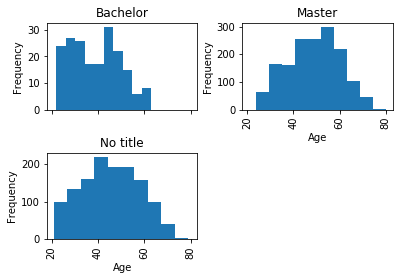

In [19]:
axes = df.hist(column='Age', by='Education', sharex=True)
for ax in axes.ravel():
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Age')